# Amazon Product Reviews Analysis

Import libraries 

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import re
import ast
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waalyousef.t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\waalyousef.t\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\waalyousef.t\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\waalyousef.t\AppData\Local\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.0+cu118
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be

Read data

In [96]:
df = pd.read_excel("../data/amazon_product_reviews.xlsx")
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹149,"â‚¹1,000",0.85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,â‚¹176.63,â‚¹499,0.65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/ima

## Exploratory Data Analysis

In [4]:
df.shape

(1465, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

- Rating count has 2 null values
- `rating`, `rating_count`, `actual_price`, and `discounted_price` are of type `object` 


In [13]:
# Show rows where rating_count is null
null_ratings = df[df["rating_count"].isnull()]

print(null_ratings)

     product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...               199   
324  Computers&Accessories|Accessories&Peripherals|...               249   

     actual_price  discount_percentage rating rating_count  \
282           999                 0.80      3          NaN   
324           999                 0.75      5          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  ðŸ’Ž[The Fastest Charge] - This iPhone USB C c...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

  

Chick Numerical Columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discount_percentage,1465.0,0.476915,0.216359,0.0,0.32,0.5,0.63,0.94


Chick Categorical Columns

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,1465,1351,B07JW9H4J1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discounted_price,1465,550,â‚¹199,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_price,1465,449,â‚¹999,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_percentage,1465.0,NaN,NaN,NaN,0.476915,0.216359,0.0,0.32,0.5,0.63,0.94
rating,1465.0,26.0,4.1,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_count,1463.0,1143.0,9378.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The count of uniq values for `product_id` and `product_name` doesn't equal the count of instances.
- `actual_price`, and `discounted_price` are a string

#### Chick for duplicated rows 

In [86]:
df.duplicated().sum()

0

#### Duplicated rows that have the same `product_id` and `product_name`

In [28]:
# Find duplicates based on product_id and product_name
duplicates = df[df.duplicated(subset=["product_id", "product_name"], keep=False)]

# Count unique (product_id, product_name) pairs that are duplicated
num_unique_pairs = duplicates[["product_id", "product_name"]].drop_duplicates().shape[0]

# Display duplicates as a pandas table
duplicates_table = duplicates.reset_index(drop=True)
duplicates_table.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
print("\nNumber of duplicated rows:", duplicates.shape[0])
print("Number of unique (product_id, product_name) pairs in duplicates:", num_unique_pairs)



Number of duplicated rows: 198
Number of unique (product_id, product_name) pairs in duplicates: 88


In [26]:
# Count frequency of each duplicated pair
freq_table = (
    duplicates.groupby(["product_id", "product_name"])
    .size()
    .reset_index(name="frequency")
)

# Display duplicates and frequency
print("Duplicated rows with frequency of each unique pair:")
freq_table

Duplicated rows with frequency of each unique pair:


,product_id,product_name,frequency
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,2
1,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,2
2,B00NH11PEY,AmazonBasics USB 2.0 - A-Male to A-Female Exte...,2
3,B0141EZMAI,"Gizga Essentials USB WiFi Adapter for PC, 150 ...",2
4,B01FSYQ2A4,boAt Rockerz 400 Bluetooth On Ear Headphones W...,2
...,...,...,...
83,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,2
84,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",2
85,B0BDRVFDKP,"SanDisk UltraÂ® microSDXCâ„¢ UHS-I Card, 64GB,...",2
86,B0BFWGBX61,Ambrane Unbreakable 3A Fast Charging Braided T...,2


In [27]:
freq_table.describe().T

,count,mean,std,min,25%,50%,75%,max
frequency,88.0,2.25,0.435494,2.0,2.0,2.0,2.25,3.0


#### Duplicated rows that have the same `review_id`

In [118]:
# Find duplicates based on review_id
duplicates_review_id_df = df[df.duplicated(subset=["review_id"], keep=False)]
duplicates_review_id_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [119]:
duplicates_review_id_df.shape

(387, 16)

In [120]:
# Count frequency of each duplicated pair
freq_table_review_id = (
    duplicates_review_id_df.groupby(["review_id"])
    .size()
    .reset_index(name="frequency")
)

# Display duplicates and frequency
print("Duplicated rows of review_id:")
freq_table_review_id.head()

Duplicated rows of review_id:


,review_id,frequency
0,"R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...",3
1,"R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...",2
2,"R10I6UIAQIP9TN,R2XEWWLV1LH7KX,R3J0MEY15WI71Z,R...",2
3,"R10KEMT1N336ZD,RL01KZO95GX4F,R1Q721FI3A7XLK,R3...",2
4,"R11MQS7WD9C3I0,R2AKH69XQY8BY4,R8GBOLYUN5UP6,R1...",3


In [121]:
freq_table_review_id.describe().T

,count,mean,std,min,25%,50%,75%,max
frequency,135.0,2.866667,1.386502,2.0,2.0,2.0,3.0,10.0


In [124]:
value = freq_table_review_id.iloc[0, 0]
review_id1 = value

value = freq_table_review_id.iloc[1, 0]
review_id2 = value

In [125]:
# Filter rows with that exact review_id
filtered_rows = df[df["review_id"] == review_id2]

filtered_rows

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
466,B01F25X6RQ,Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...,"Electronics|Headphones,Earbuds&Accessories|Hea...",499,499,0.00,4.2,31539.0,In Ear Volume Control|Design: Canal phone|Head...,"AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXFD...","Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ...",https://m.media-amazon.com/images/I/31FzYVC62w...,https://www.amazon.in/Samsung-Original-EHS64AV...
523,B01F262EUU,Samsung Original EHS64 Wired in Ear Earphones ...,"Electronics|Headphones,Earbuds&Accessories|Hea...",949,999,0.05,4.2,31539.0,In Ear Volume Control. Water Resistant: Yes|De...,"AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXFD...","Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ...",https://m.media-amazon.com/images/I/31+GLbqRPt...,https://www.amazon.in/Samsung-Original-EHS64AV...


In [114]:
value = filtered_rows.iloc[0, 1]
print(value)

value = filtered_rows.iloc[1, 1]
print(value)

Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired In Ear Earphones With Mic With Remote Note (White)
Samsung Original EHS64 Wired in Ear Earphones with Mic, Black


In [115]:
value = filtered_rows.iloc[0, 13]
print(value)

value = filtered_rows.iloc[1, 13]
print(value)

The sound quality is excellent for the price, and so are the three buttons. However, the material quality isn't good, and the wite breaks after 9 months or so.,Less bass.. good sound.. quality might be better,I like to buy this headphones,Good product,  very much I like you ðŸ‘Good sound quality. Good its really very nice product. Thank you so much samsung galaxy,I have tried many wired earphones almost every brand. But this is just perfect. Mids and lows are superb. Treble and bass are balanced well. The Remote has 3 buttons, mic works well during the call.,https://m.media-amazon.com/images/I/81qrQ52Xf8L._SY88.jpg,Its not so good not so bad,Like but....?
The sound quality is excellent for the price, and so are the three buttons. However, the material quality isn't good, and the wite breaks after 9 months or so.,Less bass.. good sound.. quality might be better,I like to buy this headphones,Good product,  very much I like you ðŸ‘Good sound quality. Good its really very nice product. T

In [116]:
value = filtered_rows.iloc[0, 10]
print(value)

value = filtered_rows.iloc[1, 10]
print(value)

Ranit Barman,Ravi Singh,Karan Rai,Amazon Customer,Saurabh,Jayesh,Amol kale,Sankar Prasad Dutta
Ranit Barman,Ravi Singh,Karan Rai,Amazon Customer,Saurabh,Jayesh,Amol kale,Sankar Prasad Dutta


In [126]:
# Filter rows with that exact review_id
filtered_rows1 = df[df["review_id"] == review_id1]

filtered_rows1

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
84,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,325,1299,0.75,4.2,10576.0,Fast Charge & Data Sync: Fast charge& data tra...,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Cable-Braided-Cha...
261,B07F1P8KNV,Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fast...,Computers&Accessories|Accessories&Peripherals|...,325,1099,0.70,4.2,10576.0,"Usb c to usb a data charging cable, fully comp...","AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Charger-Samsung-G...
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,325,1299,0.75,4.2,10576.0,Fast Charge & Data Sync: Fast charge& data tra...,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/I/41J6oGU8w5...,https://www.amazon.in/Wayona-Cable-Braided-Cha...


In [113]:
value = filtered_rows1.iloc[0, 1]
print(value)

value = filtered_rows1.iloc[1, 1]
print(value)

value = filtered_rows1.iloc[2, 1]
print(value)

Wayona Usb Type C Fast Charger Cable Fast Charging Usb C Cable/Cord Compatible For Samsung Galaxy S10E S10 S9 S8 Plus S10+,Note 10 Note 9 Note 8,S20,M31S,M40,Realme X3,Pixel 2 Xl (3 Ft Pack Of 1,Grey)
Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fast Charger Cable For Samsung Galaxy S9 S8 (Wc3Cb1, Black)
Wayona Usb Type C Fast Charger Cable Fast Charging Usb C Cable/Cord Compatible For Samsung Galaxy S10E S10 S9 S8 Plus S10+,Note 10 Note 9 Note 8,S20,M31S,M40,Realme X3,Pixel 2 Xl (3 Ft Pack Of 1,Grey)


**- The rows that have the same review_id are the same product with different variation, and they contain the same data for review related columns.**

## Clean Data

### Column Type

In [97]:
# Function to keep only numbers
def extract_number(x):
    return int(re.sub(r"\D", "", x)) if pd.notnull(x) else None

In [98]:
# Apply to price columns
df["discounted_price"] = df["discounted_price"].apply(extract_number)
df["actual_price"] = df["actual_price"].apply(extract_number)

In [99]:
# Convert columns
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price         int64
actual_price             int64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


### Drop Null Values

In [100]:
df.dropna(inplace=True)

### Duplicated Rows  

#### Duplicated Products

In [101]:
def combine_duplicates(df, subset_cols):
    """
    Combines duplicated rows based on subset_cols.
    Adds a 'freq' column and combines other columns into lists.
    """
    # Group by the subset columns
    grouped = df.groupby(subset_cols)
    
    # Count frequency
    freq_series = grouped.size()
    freq_df = freq_series.reset_index()  # convert Series to DataFrame
    freq_df = freq_df.rename(columns={0: 'freq'})  # rename the count column
    
    # Combine other columns into lists
    other_cols = [col for col in df.columns if col not in subset_cols]
    combined = grouped[other_cols].agg(list).reset_index()
    
    # Merge frequency and combined columns
    result = pd.merge(freq_df, combined, on=subset_cols)
    
    return result

In [102]:
# Use the function for product_id + product_name
combine_duplicates_df = combine_duplicates(df, ["product_id", "product_name"])
combine_duplicates_df.head()

,product_id,product_name,freq,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,2,[Computers&Accessories|NetworkingDevices|Netwo...,"[507, 507]","[1208, 1208]","[0.58, 0.58]","[4.1, 4.1]","[8131.0, 8131.0]",[Connects your computer to a high-speed wirele...,"[AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACD...","[nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,...","[R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,...","[good tool to use for,Brand is always good,Ove...",[good quality tool from d linkWiFi signal is g...,[https://m.media-amazon.com/images/I/31+NwZ8gb...,[https://www.amazon.in/D-Link-DWA-131-Wireless...
1,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,1,[Electronics|GeneralPurposeBatteries&BatteryCh...,[399],[499],[0.2],[4.3],[27201.0],[Duracell Rechargeable AAA 750mAh batteries st...,"[AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQ...","[T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyr...","[R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1...","[Works Good,Perfect replacement cell for trimm...","[Works good,Bought it to replace my Phillips Q...",[https://m.media-amazon.com/images/I/418YrbHVL...,[https://www.amazon.in/Duracell-AAA-750mAh-Rec...
2,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",1,[Computers&Accessories|Accessories&Peripherals...,[279],[375],[0.26],[4.3],[31534.0],"[A comfortable, ambidextrous shape feels good ...","[AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLH...","[Uday Joglekar,Simi Singh,Hi,chirag bansal,Swa...","[R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R...","[Handy Mouse,Good quality mouse,Good one.,Good...","[Liked this Product,https://m.media-amazon.com...",[https://m.media-amazon.com/images/I/31iFF1Kbk...,[https://www.amazon.in/Logitech-B100-Optical-M...
3,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",1,[Computers&Accessories|Accessories&Peripherals...,[699],[995],[0.3],[4.5],[54405.0],[You can surf the Web with more comfort and ea...,"[AGIOL4B6EPMZ63RZQFWZWI33O2EA,AG33OJYQIXPPS7CO...","[Chandrashekar SK,Mohammed Ashfaque,Arif Hussa...","[R28ZB0YUM6FKKB,RNB44LXBJIPTL,RVSWATRY0CJIV,R3...","[Good silent mouse,Too small to hold!,Reviewin...",[It's little small for big hands. But best ava...,[https://m.media-amazon.com/images/I/31CtVvtFt...,[https://www.amazon.in/Logitech-M235-Wireless-...
4,B005LJQMCK,BlueRigger Digital Optical Audio Toslink Cable...,1,"[Electronics|HomeTheater,TV&Video|Accessories|...",[416],[599],[0.31],[4.2],[30023.0],[Enables easy installation of audio components...,"[AG44ZU44LAA7BHECDW5VB2ZMEP2A,AGP33PWKFF63FWCV...","[Mahender Singh,Vinay,Supratim Banerjee,Vinod ...","[R25CCWBNTJMZVE,R1NKFA299UAXBR,R3FYCFR2T0C040,...","[Value for Money,A good upgrade from stock cab...",[Using with my Xbox and it's working perfectly...,[https://m.media-amazon.com/images/I/41CF6Gtnp...,[https://www.amazon.in/BlueRigger-Digital-Opti...


In [103]:
combine_duplicates_df.shape

(1305, 17)

#### Duplicated Reviews

In [104]:
# Find duplicates based on review_id from the combined dataframe
duplicates_review_id_df = combine_duplicates_df[combine_duplicates_df.duplicated(subset=["review_id"], keep=False)]
duplicates_review_id_df.head()

,product_id,product_name,freq,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
4,B005LJQMCK,BlueRigger Digital Optical Audio Toslink Cable...,1,"[Electronics|HomeTheater,TV&Video|Accessories|...",[416],[599],[0.31],[4.2],[30023.0],[Enables easy installation of audio components...,"[AG44ZU44LAA7BHECDW5VB2ZMEP2A,AGP33PWKFF63FWCV...","[Mahender Singh,Vinay,Supratim Banerjee,Vinod ...","[R25CCWBNTJMZVE,R1NKFA299UAXBR,R3FYCFR2T0C040,...","[Value for Money,A good upgrade from stock cab...",[Using with my Xbox and it's working perfectly...,[https://m.media-amazon.com/images/I/41CF6Gtnp...,[https://www.amazon.in/BlueRigger-Digital-Opti...
5,B005LJQMZC,BlueRigger Digital Optical Audio Toslink Cable...,1,"[Electronics|HomeTheater,TV&Video|Accessories|...",[486],[1999],[0.76],[4.2],[30023.0],[Enables easy installation of audio components...,"[AG44ZU44LAA7BHECDW5VB2ZMEP2A,AGP33PWKFF63FWCV...","[Mahender Singh,Vinay,Supratim Banerjee,Vinod ...","[R25CCWBNTJMZVE,R1NKFA299UAXBR,R3FYCFR2T0C040,...","[Value for Money,A good upgrade from stock cab...",[Using with my Xbox and it's working perfectly...,[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/BlueRigger-Digital-Opti...
112,B00V4BGDKU,TP-Link UE300 USB 3.0 to RJ45 Gigabit Ethernet...,1,[Computers&Accessories|NetworkingDevices|Netwo...,[1099],[1899],[0.42],[4.5],[22420.0],[Fastest USB 3.0 and Gigabit solution ensure h...,"[AHQC27SWWMUOTO3W7NGIG7KPX2AQ,AH3ZNJWSAOEWIBD3...","[MOINUL H.,Jayendra Pai,Avinash kumar,Sreekant...","[R30SWI8U6K7PDR,R2K3WL7JFGLDI,R2WXWZRPAKQ1GP,R...","[Easy to use,Working fine - but errors while u...","[Good looking amd working fine.,I brought this...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/TP-Link-TL-UE300-Gigabi...
157,B01F25X6RQ,Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...,1,"[Electronics|Headphones,Earbuds&Accessories|He...",[499],[499],[0.0],[4.2],[31539.0],[In Ear Volume Control|Design: Canal phone|Hea...,"[AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXF...","[Ranit Barman,Ravi Singh,Karan Rai,Amazon Cust...","[R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,...","[Works well, but not for long,Good product,Goo...","[The sound quality is excellent for the price,...",[https://m.media-amazon.com/images/I/31FzYVC62...,[https://www.amazon.in/Samsung-Original-EHS64A...
158,B01F262EUU,Samsung Original EHS64 Wired in Ear Earphones ...,1,"[Electronics|Headphones,Earbuds&Accessories|He...",[949],[999],[0.05],[4.2],[31539.0],[In Ear Volume Control. Water Resistant: Yes|D...,"[AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXF...","[Ranit Barman,Ravi Singh,Karan Rai,Amazon Cust...","[R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,...","[Works well, but not for long,Good product,Goo...","[The sound quality is excellent for the price,...",[https://m.media-amazon.com/images/I/31+GLbqRP...,[https://www.amazon.in/Samsung-Original-EHS64A...


In [105]:
duplicates_review_id_df.shape

(180, 17)

In [107]:
def combine_by_review_id(df, id_col="review_id"):
    """
    Combine rows with the same review_id.
    For all other columns, merge the values into lists and count frequency.
    """
    # Ensure review_id is hashable: convert lists to tuples if needed
    df[id_col] = df[id_col].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    
    # Group by review_id
    grouped = df.groupby(id_col, as_index=False)
    
    # Frequency: how many rows shared the review_id
    freq_series = grouped.size()
    
    # Combine other columns into lists
    other_cols = [col for col in df.columns if col != id_col]
    combined = grouped[other_cols].agg(lambda x: list(pd.unique([item for sublist in x for item in (sublist if isinstance(sublist, list) else [sublist])]))).reset_index(drop=True)
    
    # Merge frequency and combined columns
    result = pd.merge(freq_series, combined, left_on=id_col, right_on=id_col)
    
    return result

In [108]:
# Apply function
combined_df = combine_by_review_id(combine_duplicates_df)
combined_df.head()

C:\Users\warif\AppData\Local\Temp\ipykernel_5172\1951651085.py:17: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  combined = grouped[other_cols].agg(lambda x: list(pd.unique([item for sublist in x for item in (sublist if isinstance(sublist, list) else [sublist])]))).reset_index(drop=True)


,review_id,size,product_id,product_name,freq,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_title,review_content,img_link,product_link
0,"(R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2...",1,[B07F1P8KNV],[Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fas...,[1],[Computers&Accessories|Accessories&Peripherals...,[325],[1099],[0.7],[4.2],[10576.0],"[Usb c to usb a data charging cable, fully com...","[AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFX...","[Sunil Funde,Biju Abraham Thomas,Samir,Rahul S...","[Nice product .,Good quality Braided cable, VF...","[Sturdy packing, good product!,Have used this ...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Wayona-Charger-Samsung-...
1,"(R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2...",1,[B07GVGTSLN],[Wayona Usb Type C Fast Charger Cable Fast Cha...,[2],[Computers&Accessories|Accessories&Peripherals...,[325],[1299],[0.75],[4.2],[10576.0],[Fast Charge & Data Sync: Fast charge& data tr...,"[AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFX...","[Sunil Funde,Biju Abraham Thomas,Samir,Rahul S...","[Nice product .,Good quality Braided cable, VF...","[Sturdy packing, good product!,Have used this ...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Wayona-Cable-Braided-Ch...
2,"(R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH,...",1,[B08QJJCY2Q],[Tizum Mouse Pad/ Computer Mouse Mat with Anti...,[1],[Computers&Accessories|Accessories&Peripherals...,[169],[299],[0.43],[4.4],[5176.0],[9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm ...,"[AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TCN...","[Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venkat...","[Nice product,Size is not to big not to small,...","[Nice product,if you want to use your mouse fo...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Notebook-MacBook-Comput...
3,"(R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,...",2,"[B01F25X6RQ, B01F262EUU]",[Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired...,[1],"[Electronics|Headphones,Earbuds&Accessories|He...","[499, 949]","[499, 999]","[0.0, 0.05]",[4.2],[31539.0],[In Ear Volume Control|Design: Canal phone|Hea...,"[AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXF...","[Ranit Barman,Ravi Singh,Karan Rai,Amazon Cust...","[Works well, but not for long,Good product,Goo...","[The sound quality is excellent for the price,...",[https://m.media-amazon.com/images/I/31FzYVC62...,[https://www.amazon.in/Samsung-Original-EHS64A...
4,"(R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,R...",1,[B09C6H53KH],[Duracell Type-C To Micro 1.2M braided Sync & ...,[1],[Computers&Accessories|Accessories&Peripherals...,[368],[699],[0.47],[4.2],[387.0],[1.2M Tangle Free durable tough braiding sync ...,"[AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6O...","[Sreejith ks,chetan w.,ASR,vajreshwari,Raghava...","[Superb,Reviewing after 3 months of use,Good b...","[Superb,I'm using this in my car from 3 months...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/DURACELL-Type-C-Micro-b...


#### Reorder and Rename Columns

In [110]:
# Rename columns
combined_df = combined_df.rename(columns={
    "freq": "review_count",
    "size": "product_count"
})

# Ensure review_count is not a list (convert to int if inside list)
if combined_df["review_count"].apply(lambda x: isinstance(x, list)).any():
    combined_df["review_count"] = combined_df["review_count"].apply(lambda x: x[0] if isinstance(x, list) else x)

# Reorder columns so review_id is col #12 and product_count col #13
cols = list(combined_df.columns)

# Find current positions
if "review_id" in cols and "product_count" in cols:
    cols.remove("review_id")
    cols.remove("product_count")
    # Insert review_id at 12, product_count at 13
    cols.insert(11, "review_id")
    cols.insert(12, "product_count")

combined_df = combined_df[cols]

combined_df.head()


,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link
0,[B07F1P8KNV],[Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fas...,1,[Computers&Accessories|Accessories&Peripherals...,[325],[1099],[0.7],[4.2],[10576.0],"[Usb c to usb a data charging cable, fully com...","[AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFX...","(R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2...",1,"[Sunil Funde,Biju Abraham Thomas,Samir,Rahul S...","[Nice product .,Good quality Braided cable, VF...","[Sturdy packing, good product!,Have used this ...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Wayona-Charger-Samsung-...
1,[B07GVGTSLN],[Wayona Usb Type C Fast Charger Cable Fast Cha...,2,[Computers&Accessories|Accessories&Peripherals...,[325],[1299],[0.75],[4.2],[10576.0],[Fast Charge & Data Sync: Fast charge& data tr...,"[AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFX...","(R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2...",1,"[Sunil Funde,Biju Abraham Thomas,Samir,Rahul S...","[Nice product .,Good quality Braided cable, VF...","[Sturdy packing, good product!,Have used this ...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Wayona-Cable-Braided-Ch...
2,[B08QJJCY2Q],[Tizum Mouse Pad/ Computer Mouse Mat with Anti...,1,[Computers&Accessories|Accessories&Peripherals...,[169],[299],[0.43],[4.4],[5176.0],[9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm ...,"[AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TCN...","(R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH,...",1,"[Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venkat...","[Nice product,Size is not to big not to small,...","[Nice product,if you want to use your mouse fo...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/Notebook-MacBook-Comput...
3,"[B01F25X6RQ, B01F262EUU]",[Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired...,1,"[Electronics|Headphones,Earbuds&Accessories|He...","[499, 949]","[499, 999]","[0.0, 0.05]",[4.2],[31539.0],[In Ear Volume Control|Design: Canal phone|Hea...,"[AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXF...","(R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,...",2,"[Ranit Barman,Ravi Singh,Karan Rai,Amazon Cust...","[Works well, but not for long,Good product,Goo...","[The sound quality is excellent for the price,...",[https://m.media-amazon.com/images/I/31FzYVC62...,[https://www.amazon.in/Samsung-Original-EHS64A...
4,[B09C6H53KH],[Duracell Type-C To Micro 1.2M braided Sync & ...,1,[Computers&Accessories|Accessories&Peripherals...,[368],[699],[0.47],[4.2],[387.0],[1.2M Tangle Free durable tough braiding sync ...,"[AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6O...","(R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,R...",1,"[Sreejith ks,chetan w.,ASR,vajreshwari,Raghava...","[Superb,Reviewing after 3 months of use,Good b...","[Superb,I'm using this in my car from 3 months...",[https://m.media-amazon.com/images/W/WEBP_4023...,[https://www.amazon.in/DURACELL-Type-C-Micro-b...


In [84]:
# Save to Excel in the data folder
combined_df.to_excel("../data/cleaned_data.xlsx", index=False)

In [2]:
cleanDF = pd.read_excel("../data/cleaned_data.xlsx")
cleanDF.head()

,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link
0,['B07F1P8KNV'],['Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fa...,1,['Computers&Accessories|Accessories&Peripheral...,[325],[1099],[0.7],[4.2],[10576.0],"['Usb c to usb a data charging cable, fully co...","['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...","['Nice product .,Good quality Braided cable, V...","[""Sturdy packing, good product!,Have used this...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Charger-Samsung...
1,['B07GVGTSLN'],['Wayona Usb Type C Fast Charger Cable Fast Ch...,2,['Computers&Accessories|Accessories&Peripheral...,[325],[1299],[0.75],[4.2],[10576.0],['Fast Charge & Data Sync: Fast charge& data t...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...","['Nice product .,Good quality Braided cable, V...","[""Sturdy packing, good product!,Have used this...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Cable-Braided-C...
2,['B08QJJCY2Q'],['Tizum Mouse Pad/ Computer Mouse Mat with Ant...,1,['Computers&Accessories|Accessories&Peripheral...,[169],[299],[0.43],[4.4],[5176.0],['9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm...,"['AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TC...","('R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH...",1,"['Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venka...","['Nice product,Size is not to big not to small...","[""Nice product,if you want to use your mouse f...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Notebook-MacBook-Compu...
3,"['B01F25X6RQ', 'B01F262EUU']",['Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wire...,1,"['Electronics|Headphones,Earbuds&Accessories|H...","[499, 949]","[499, 999]","[0.0, 0.05]",[4.2],[31539.0],['In Ear Volume Control|Design: Canal phone|He...,"['AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MX...","('R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI...",2,"['Ranit Barman,Ravi Singh,Karan Rai,Amazon Cus...","['Works well, but not for long,Good product,Go...","[""The sound quality is excellent for the price...",['https://m.media-amazon.com/images/I/31FzYVC6...,['https://www.amazon.in/Samsung-Original-EHS64...
4,['B09C6H53KH'],['Duracell Type-C To Micro 1.2M braided Sync &...,1,['Computers&Accessories|Accessories&Peripheral...,[368],[699],[0.47],[4.2],[387.0],['1.2M Tangle Free durable tough braiding sync...,"['AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6...","('R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,...",1,"['Sreejith ks,chetan w.,ASR,vajreshwari,Raghav...","[""Superb,Reviewing after 3 months of use,Good ...","[""Superb,I'm using this in my car from 3 month...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/DURACELL-Type-C-Micro-...


## Preprocess Data

### Categorical columns

In [3]:
def split_category(cat_str):
    # If the value looks like a stringified list, convert it to a real list
    if isinstance(cat_str, str) and cat_str.startswith("[") and cat_str.endswith("]"):
        try:
            cat_str = ast.literal_eval(cat_str)  # safely convert string to list
            cat_str = "|".join(cat_str)  # rejoin if it was already a list
        except:
            pass
    
    # Split by "|" first
    parts = cat_str.split("|")
    # Replace "&" with " & " and ensure spacing after commas
    parts = [p.replace("&", " & ").replace(",", ", ").strip() for p in parts]
    return parts

In [4]:
# Apply cleaning
cleanDF["category"] = cleanDF["category"].apply(split_category)

print(cleanDF["category"].iloc[0])

['Computers & Accessories', 'Accessories & Peripherals', 'Cables & Accessories', 'Cables', 'USBCables']


### Numerical Columns  

In [5]:
def replace_with_avg(df, cols):
    """
    Replace list/stringified-list values in given columns with their average (scalar).
    """
    def to_avg(x):
        # If it's a string that looks like a list then convert to real list
        if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
            try:
                x = ast.literal_eval(x)
            except:
                return np.nan  # fallback if bad format
        # If it's a list take mean
        if isinstance(x, (list, np.ndarray)):
            return float(np.mean(x))
        # Otherwise just return as float if possible
        try:
            return float(x)
        except:
            return np.nan

    for col in cols:
        df[col] = df[col].apply(to_avg)
    return df

In [6]:
# Apply to Numerical columns
cols_to_avg = ["discounted_price", "actual_price", "discount_percentage", "rating_count","rating"]
cleanDF = replace_with_avg(cleanDF, cols_to_avg)

cleanDF.head()

,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link
0,['B07F1P8KNV'],['Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fa...,1,"[Computers & Accessories, Accessories & Periph...",325.0,1099.0,0.700,4.2,10576.0,"['Usb c to usb a data charging cable, fully co...","['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...","['Nice product .,Good quality Braided cable, V...","[""Sturdy packing, good product!,Have used this...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Charger-Samsung...
1,['B07GVGTSLN'],['Wayona Usb Type C Fast Charger Cable Fast Ch...,2,"[Computers & Accessories, Accessories & Periph...",325.0,1299.0,0.750,4.2,10576.0,['Fast Charge & Data Sync: Fast charge& data t...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...","['Nice product .,Good quality Braided cable, V...","[""Sturdy packing, good product!,Have used this...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Cable-Braided-C...
2,['B08QJJCY2Q'],['Tizum Mouse Pad/ Computer Mouse Mat with Ant...,1,"[Computers & Accessories, Accessories & Periph...",169.0,299.0,0.430,4.4,5176.0,['9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm...,"['AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TC...","('R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH...",1,"['Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venka...","['Nice product,Size is not to big not to small...","[""Nice product,if you want to use your mouse f...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Notebook-MacBook-Compu...
3,"['B01F25X6RQ', 'B01F262EUU']",['Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wire...,1,"[Electronics, Headphones, Earbuds & Accessorie...",724.0,749.0,0.025,4.2,31539.0,['In Ear Volume Control|Design: Canal phone|He...,"['AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MX...","('R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI...",2,"['Ranit Barman,Ravi Singh,Karan Rai,Amazon Cus...","['Works well, but not for long,Good product,Go...","[""The sound quality is excellent for the price...",['https://m.media-amazon.com/images/I/31FzYVC6...,['https://www.amazon.in/Samsung-Original-EHS64...
4,['B09C6H53KH'],['Duracell Type-C To Micro 1.2M braided Sync &...,1,"[Computers & Accessories, Accessories & Periph...",368.0,699.0,0.470,4.2,387.0,['1.2M Tangle Free durable tough braiding sync...,"['AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6...","('R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,...",1,"['Sreejith ks,chetan w.,ASR,vajreshwari,Raghav...","[""Superb,Reviewing after 3 months of use,Good ...","[""Superb,I'm using this in my car from 3 month...",['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/DURACELL-Type-C-Micro-...


### Preprocessing Text

In [7]:
def flatten_text(x):
    """Convert list-like values (or strings of lists) into plain text."""
    if x is None:
        return ""
    if isinstance(x, (list, tuple, np.ndarray)):
        return " ".join(map(str, x))
    if isinstance(x, str):
        # Handle string that looks like a list
        if x.startswith("[") and x.endswith("]"):
            try:
                import ast
                lst = ast.literal_eval(x)
                if isinstance(lst, (list, tuple)):
                    return " ".join(map(str, lst))
            except Exception:
                pass
        return x
    return str(x)

In [8]:
# prepare tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    """
    Full text preprocessing:
    - lowercase
    - remove urls, html, special chars/numbers
    - tokenize
    - remove stopwords
    - lemmatize words
    """
    if pd.isna(text):
        return ""

    # lowercase
    text = text.lower()

    # remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # remove html tags
    text = re.sub(r"<.*?>", "", text)

    # keep only letters
    text = re.sub(r"[^a-z\s]", " ", text)

    # tokenize
    words = text.split()

    # remove stopwords + lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    # join back to string
    return " ".join(words)

In [9]:
text_columns = [
    "product_name",
    "category",
    "about_product",
    "review_title",
    "review_content"
]

for col in text_columns:
    cleanDF[col] = cleanDF[col].map(flatten_text).map(preprocess_text)

cleanDF.head()

,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link
0,['B07F1P8KNV'],wayona nylon braided usb type c ft fast charge...,1,computer accessory accessory peripheral cable ...,325.0,1099.0,0.700,4.2,10576.0,usb c usb data charging cable fully compatible...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Charger-Samsung...
1,['B07GVGTSLN'],wayona usb type c fast charger cable fast char...,2,computer accessory accessory peripheral cable ...,325.0,1299.0,0.750,4.2,10576.0,fast charge data sync fast charge data transfe...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Cable-Braided-C...
2,['B08QJJCY2Q'],tizum mouse pad computer mouse mat anti slip r...,1,computer accessory accessory peripheral keyboa...,169.0,299.0,0.430,4.4,5176.0,inch x inch mm x mm x mm size mouse pad ideal ...,"['AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TC...","('R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH...",1,"['Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venka...",nice product size big small liked ok really go...,nice product want use mouse gaming stuff life ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Notebook-MacBook-Compu...
3,"['B01F25X6RQ', 'B01F262EUU']",samsung ehs ehs avfwecinu hand free wired ear ...,1,electronics headphone earbuds accessory headph...,724.0,749.0,0.025,4.2,31539.0,ear volume control design canal phone headphon...,"['AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MX...","('R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI...",2,"['Ranit Barman,Ravi Singh,Karan Rai,Amazon Cus...",work well long good product good product good ...,sound quality excellent price three button how...,['https://m.media-amazon.com/images/I/31FzYVC6...,['https://www.amazon.in/Samsung-Original-EHS64...
4,['B09C6H53KH'],duracell type c micro braided sync charge cabl...,1,computer accessory accessory peripheral cable ...,368.0,699.0,0.470,4.2,387.0,tangle free durable tough braiding sync charge...,"['AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6...","('R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,...",1,"['Sreejith ks,chetan w.,ASR,vajreshwari,Raghav...",superb reviewing month use good braided cable ...,superb using car month quality product describ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/DURACELL-Type-C-Micro-...


### Fetcher Engineering

In [10]:
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

In [ ]:
# model is in eval mode
model.eval()

# Function to get sentiment
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.nn.functional.softmax(outputs.logits, dim=1)
        predicted_class = scores.argmax(dim=1).item()
    return predicted_class  # returns class index (  0–4 for 1 to 5 stars)

In [23]:
# Create a new column for both review_title and review_content
cleanDF["full_review"] = cleanDF["review_title"].fillna("") + " " + cleanDF["review_content"].fillna("")
cleanDF["sentiment"] = cleanDF["full_review"].apply(get_sentiment)

In [32]:
# To be actual star ratings (1–5 instead of 0–4)
cleanDF["sentiment"]= cleanDF["sentiment"]+1

In [21]:
cleanDF.head()

,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link,sentiment
0,['B07F1P8KNV'],wayona nylon braided usb type c ft fast charge...,1,computer accessory accessory peripheral cable ...,325.0,1099.0,0.700,4.2,10576.0,usb c usb data charging cable fully compatible...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Charger-Samsung...,4
1,['B07GVGTSLN'],wayona usb type c fast charger cable fast char...,2,computer accessory accessory peripheral cable ...,325.0,1299.0,0.750,4.2,10576.0,fast charge data sync fast charge data transfe...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Cable-Braided-C...,4
2,['B08QJJCY2Q'],tizum mouse pad computer mouse mat anti slip r...,1,computer accessory accessory peripheral keyboa...,169.0,299.0,0.430,4.4,5176.0,inch x inch mm x mm x mm size mouse pad ideal ...,"['AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TC...","('R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH...",1,"['Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venka...",nice product size big small liked ok really go...,nice product want use mouse gaming stuff life ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Notebook-MacBook-Compu...,4
3,"['B01F25X6RQ', 'B01F262EUU']",samsung ehs ehs avfwecinu hand free wired ear ...,1,electronics headphone earbuds accessory headph...,724.0,749.0,0.025,4.2,31539.0,ear volume control design canal phone headphon...,"['AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MX...","('R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI...",2,"['Ranit Barman,Ravi Singh,Karan Rai,Amazon Cus...",work well long good product good product good ...,sound quality excellent price three button how...,['https://m.media-amazon.com/images/I/31FzYVC6...,['https://www.amazon.in/Samsung-Original-EHS64...,3
4,['B09C6H53KH'],duracell type c micro braided sync charge cabl...,1,computer accessory accessory peripheral cable ...,368.0,699.0,0.470,4.2,387.0,tangle free durable tough braiding sync charge...,"['AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6...","('R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,...",1,"['Sreejith ks,chetan w.,ASR,vajreshwari,Raghav...",superb reviewing month use good braided cable ...,superb using car month quality product describ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/DURACELL-Type-C-Micro-...,5


In [35]:
cleanDF["sentiment"].describe().T

count    1191.000000
mean        4.085642
std         0.936319
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sentiment, dtype: float64

In [22]:
# Save to Excel in the data folder
cleanDF.to_excel("../data/processedDF.xlsx", index=False)

In [4]:
processedDF = pd.read_excel("../data/processedDF.xlsx")
processedDF.head()

,product_id,product_name,review_count,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,product_count,user_name,review_title,review_content,img_link,product_link,sentiment
0,['B07F1P8KNV'],wayona nylon braided usb type c ft fast charge...,1,computer accessory accessory peripheral cable ...,325.0,1099.0,0.700,4.2,10576.0,usb c usb data charging cable fully compatible...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Charger-Samsung...,4
1,['B07GVGTSLN'],wayona usb type c fast charger cable fast char...,2,computer accessory accessory peripheral cable ...,325.0,1299.0,0.750,4.2,10576.0,fast charge data sync fast charge data transfe...,"['AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZF...","('R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R...",1,"['Sunil Funde,Biju Abraham Thomas,Samir,Rahul ...",nice product good quality braided cable vfm go...,sturdy packing good product used brand cable i...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Wayona-Cable-Braided-C...,4
2,['B08QJJCY2Q'],tizum mouse pad computer mouse mat anti slip r...,1,computer accessory accessory peripheral keyboa...,169.0,299.0,0.430,4.4,5176.0,inch x inch mm x mm x mm size mouse pad ideal ...,"['AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TC...","('R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH...",1,"['Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venka...",nice product size big small liked ok really go...,nice product want use mouse gaming stuff life ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/Notebook-MacBook-Compu...,4
3,"['B01F25X6RQ', 'B01F262EUU']",samsung ehs ehs avfwecinu hand free wired ear ...,1,electronics headphone earbuds accessory headph...,724.0,749.0,0.025,4.2,31539.0,ear volume control design canal phone headphon...,"['AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MX...","('R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI...",2,"['Ranit Barman,Ravi Singh,Karan Rai,Amazon Cus...",work well long good product good product good ...,sound quality excellent price three button how...,['https://m.media-amazon.com/images/I/31FzYVC6...,['https://www.amazon.in/Samsung-Original-EHS64...,3
4,['B09C6H53KH'],duracell type c micro braided sync charge cabl...,1,computer accessory accessory peripheral cable ...,368.0,699.0,0.470,4.2,387.0,tangle free durable tough braiding sync charge...,"['AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6...","('R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,...",1,"['Sreejith ks,chetan w.,ASR,vajreshwari,Raghav...",superb reviewing month use good braided cable ...,superb using car month quality product describ...,['https://m.media-amazon.com/images/W/WEBP_402...,['https://www.amazon.in/DURACELL-Type-C-Micro-...,5


## Analysis    

In [7]:
! pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.8 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- ----

1. Distribution of Ratings

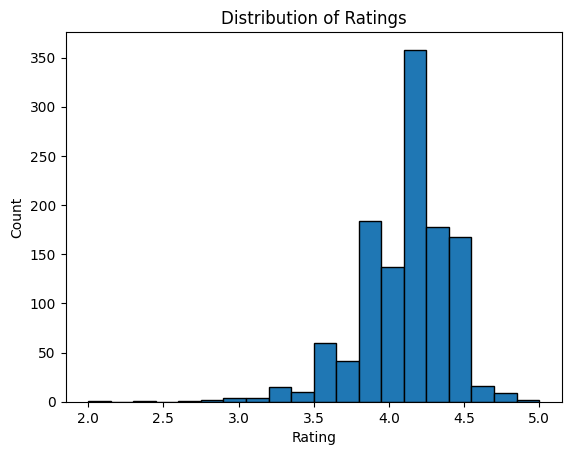

In [8]:
import matplotlib.pyplot as plt

plt.hist(processedDF["rating"], bins=20, edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

Almost all product are rated between 3.5 to 4.5

2. Discount % vs. Rating (Scatter Plot)

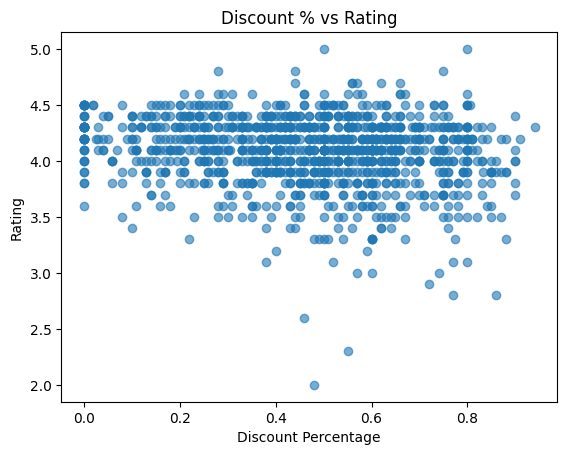

In [9]:
plt.scatter(processedDF["discount_percentage"], processedDF["rating"], alpha=0.6)
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.title("Discount % vs Rating")
plt.show()

No clear trend between Discount % vs. Rating

3. Sentiment Distribution

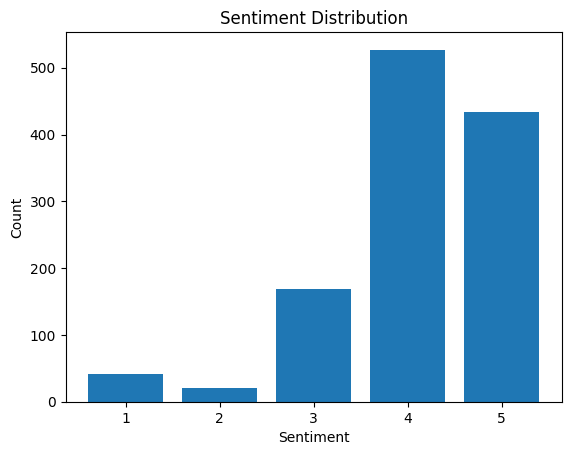

In [12]:
sent_counts = processedDF["sentiment"].value_counts()

plt.bar(sent_counts.index, sent_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

Most data were predicted py the sentiment model to be 4 or 5

4. Discounted Price vs. Actual Price (Scatter Plot)

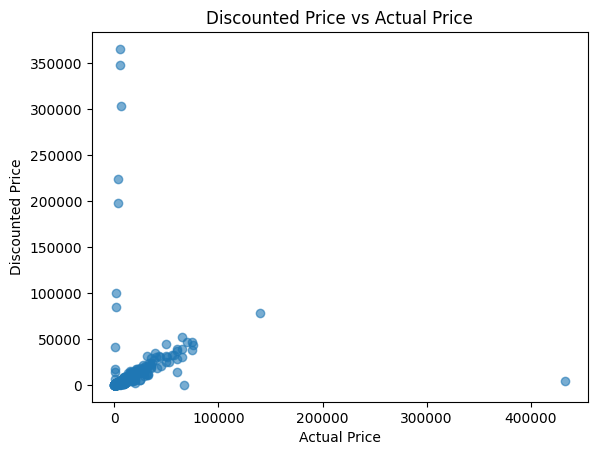

In [13]:
plt.scatter(processedDF["actual_price"], processedDF["discounted_price"], alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Discounted Price vs Actual Price")
plt.show()

there is a notable positive correlation 

5. Rating Count vs. Rating (Scatter Plot)

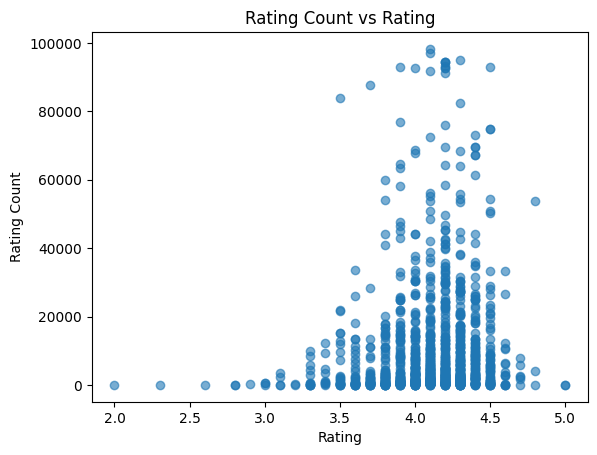

In [14]:
plt.scatter(processedDF["rating"], processedDF["rating_count"], alpha=0.6)
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.title("Rating Count vs Rating")
plt.show()

products with high rating count usually fall in the 4 to 4.5 rating range